In [1]:
import network_design as nd
import networkx as nx
import scipy.linalg as la
import matplotlib.pyplot as plt
import numpy as np

The goal of this notebook is to explore the degree dynamics and the assembly dynamics of the master equation approach of network design.

## Review of Master Equation Approach

The master equation approach is an assembly process built from the following equations:
$$\begin{align}
p_{ij}(t)&=r(x_i,x_j)o_{ij}(t)\\
\frac{do_{ij}}{dt}&=-\max\left\{\sum_{l\in\theta_j}r(x_i,x_l)o_{il}(t),\sum_{l\in\theta_i}r(x_l,x_j)o_{lj}(t)\right\}.
\end{align}$$

We can solve this assembly process for $t\rightarrow\infty$ to be
$$\begin{align}
p_{ij}&=\frac{r(x_i,x_j)o_{ij}(0)}{\max\left\{\sum_{l\in\theta_j}r(x_l,x_j),\sum_{l\in\theta_i}r(x_i,x_l)\right\}}.
\end{align}$$

In the case the we have random connections, then $r(x_i,x_j)=\frac{2}{N(N-1)}=r^*$ for all $i,j\in V(G)$.
For now we will assume $r(x_i,x_j)=r^*$.
In this case, our final solution simplifies to
$$\begin{align}
p_{ij}&=\frac{o_{ij}(0)}{\max\left\{N_j,N_i\right\}}.
\end{align}$$

We now review various dynamics in the assembly process.

## Degree Dynamics

As the model proceeds through times, each node will continue to increase degree until it is at full capacity.
Consider a node $i$ with particle type $\theta_i$.
Then we know that
$k_{i}(0)=0$.
At each timestep, we know that
$$
\begin{align}
\frac{dk_i}{dt}&=\sum_{j\in V(G)}r(x_i,x_j)\mathbb{1}\left\{o_{ij}(t)>0\right\}.
\end{align}
$$

To understand this expression, we need to understand the rate of decay of $o_{ij}(t)$.
We know that as each time step, a node $j$ will interact with particles of type $N_{\theta_i}$ a total of $r^*N_{\theta_i}$ times.
Thus in order for a node to fully connect with particles $\theta_i$, we need
$$
\begin{align}
o_{ji}(0)&=r^*N_{\theta_i}t\\
&=\frac{2N_{\theta_i}}{N(N-1)}t\\
\frac{N(N-1)o_{ji}(0)}{2N_{\theta_i}}&=t.
\end{align}
$$
At this point the node will become completely saturated with connections to particles of type $\theta_i$.

Thus we have that
$$\begin{align}
\frac{dk_i(\theta_j)}{dt}&=\sum_{k\in\theta_j}r(x_i,x_k)
\end{align}
$$
for $t_{ij}<\frac{N(N-1)o_{ij}(0)}{2N_{\theta_j}}$.
Then $\frac{dk_i(\theta_j)}{dt}=0$.

Consequently, we have
$$\begin{align}
k_i[\theta_j](t_*)&=\int_{t=0}^{\min\{t_*,t_{ij}\}}\sum_{k\in\theta_j}r(x_i,x_k)dt\\
&=\min\{t_*,t_{ij}\}\sum_{k\in\theta_j}r(x_i,x_k)\\
&=\frac{2N_{\theta_j}\min\{t_*,t_{ij}\}}{N(N-1)}.
\end{align}$$

As a sanity check, we see that $k_i[\theta_j](\infty)=o_{ij}(0)$ as expected.

Then to solve for the total degree of node $i$ we get
$$
\begin{align}
k_i(t)&=\sum_{\theta_j}k_{i}[\theta_j](t_*)\\
&=\frac{2}{N(N-1)}\sum_{\theta_j}N_{\theta_j}\min\{t_*,t_{ij}\}.
\end{align}
$$
Again as a sanity check, we see that
$$
\begin{align}
k_i(\infty)&=\frac{2}{N(N-1)}\sum_{\theta_j}N_{\theta_j}t_{ij}\\
&=\sum_{\theta_j}o_{i\theta_j}(0).
\end{align}
$$

### Numerical Verification

Note that in this work, we assume that we have large $N$.
Consequently we work with networks of size $N=10^3$.
We begin with 5 different particles which has randomly assigned rules each with degree 20. We divide these particles out such that $N_1=50,N_2=100,N_3=200,N_4=250,N_5=400$.

In [ ]:
def draw_degree_dyn_ex(X

In [2]:
capacities = nd.assign_particles(5,20)

In [3]:
X = np.zeros((1000,5))
X[:50,0] = 1
X[50:150,1] = 1
X[150:350,2] = 1
X[350:600,3] = 1
X[600:,4] = 1

In [6]:
capacities
N = [50,100,200,250,400]

In [5]:
O = np.zeros((5,5))
for i in range(5):
    for j in range(5):
        O[i,j] = capacities[i][j]

In [8]:
2*np.sum([np.sum(O[i])*N[i] for i in range(5)]) / 1000

np.float64(40.0)

In [6]:
deg_dynamics_test = nd.NetDesign(X,capacities)

In [30]:
# deg = np.zeros((1000,10000))
for t in range(2000,10000):
    deg_dynamics_test.simulate(10)
    deg[:,t] = np.array(deg_dynamics_test.g.degree())[:,1]

In [45]:
t_12 = (1000)*(999)/1000
t_12

999.0

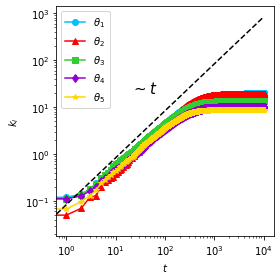

In [101]:
plt.figure(figsize=(4,4))
x = np.arange(10000)
plt.loglog(x,np.mean(deg[0:50,:],axis=0),'-o',label=r'$\theta_1$',color='deepskyblue')
plt.loglog(x,np.mean(deg[50:150,:],axis=0),'-^',label=r'$\theta_2$',color='r')
plt.loglog(x,np.mean(deg[150:350,:],axis=0),'-s',label=r'$\theta_3$',color='limegreen')
plt.loglog(x,np.mean(deg[350:600,:],axis=0),'-d',label=r'$\theta_4$',color='darkviolet')
plt.loglog(x,np.mean(deg[600:,:],axis=0),'-*',label=r'$\theta_5$',color='gold')
plt.loglog(x,x**(1)/12,'--',color='k')
plt.legend()
plt.text(20,20,'$\sim t$',fontsize=15)
plt.xlabel('$t$')
plt.ylabel('$k_i$')
# plt.title('Heterogeneous Particle Distribution')
plt.tight_layout()
plt.savefig('figs/drafts/v2/fig5/hetero_dynamics.pdf')
plt.show()
# plt.vlines(t_12,10**(-2),10**2)

In [90]:
def draw_lattice_particle_network(g,X,pos=None,file=None,figsize=(3,3),with_labels=False,directed=False):
    """
    Draw particle network in style of Fig. 1
    
    Parameters:
        g (networkx)
        X (ndarray) - node labels
    """
    fig = plt.figure(figsize=figsize)
    # create weighted graph from M
#     g = nx.Graph()
#     for u,v,data in M.edges(data=True):
#         w = data['weight'] if 'weight' in data else 1.0
#         if g.has_edge(u,v):
#             g[u][v]['weight'] += w
#         else:
#             g.add_edge(u, v, weight=w)
            
    if pos is None:
        pos = nx.spring_layout(g)
        
    
    for edge in g.edges(data='weight'):
        if directed:
            nx.draw_networkx_edges(g,pos=pos,edgelist=[edge],arrowsize=20)
        else:
            nx.draw_networkx_edges(g,pos=pos,edgelist=[edge])
    
    # Draw particles \theta_1
    nx.draw_networkx_nodes(nx.subgraph(g,set(np.where(X[:,0]==1)[0])),
                       pos=pos,
                       node_color='deepskyblue',
                       linewidths=1,
                       node_shape='o',
                       edgecolors='w')
    
    # Draw particles \theta_2
    nx.draw_networkx_nodes(nx.subgraph(g,set(np.where(X[:,1]==1)[0])),
                       pos=pos,
                       node_color='red',
                       linewidths=1,
                       node_shape='o',
                       edgecolors='w')
    
    nx.draw_networkx_nodes(nx.subgraph(g,set(np.where(X[:,2]==1)[0])),
                       pos=pos,
                       node_color='limegreen',
                       linewidths=1,
                       node_shape='o',
                       edgecolors='w')
    
    nx.draw_networkx_nodes(nx.subgraph(g,set(np.where(X[:,3]==1)[0])),
                       pos=pos,
                       node_color='darkviolet',
                       linewidths=1,
                       node_shape='o',
                       edgecolors='w')
    
    nx.draw_networkx_nodes(nx.subgraph(g,set(np.where(X[:,4]==1)[0])),
                       pos=pos,
                       node_color='gold',
                       linewidths=1,
                       node_shape='o',
                       edgecolors='w')
    
    
    if with_labels:
        nx.draw_networkx_labels(g,pos)
        
    if file != None:
        plt.savefig(file)
    plt.axis('off')
    plt.show()

In [93]:
pos = nx.spring_layout(deg_dynamics_test.g)

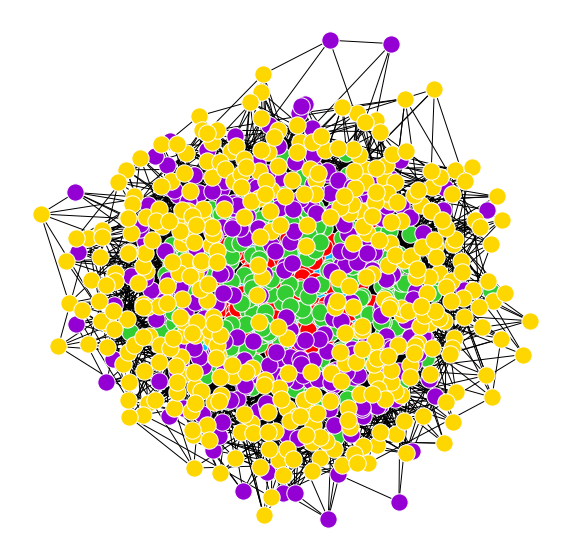

In [96]:
draw_lattice_particle_network(deg_dynamics_test.g,X,pos=pos,figsize=(10,10),file='figs/drafts/v2/fig5/hetero_g.pdf')

In [97]:
pos_homo = nx.spring_layout(deg_dynamics_homo.g)


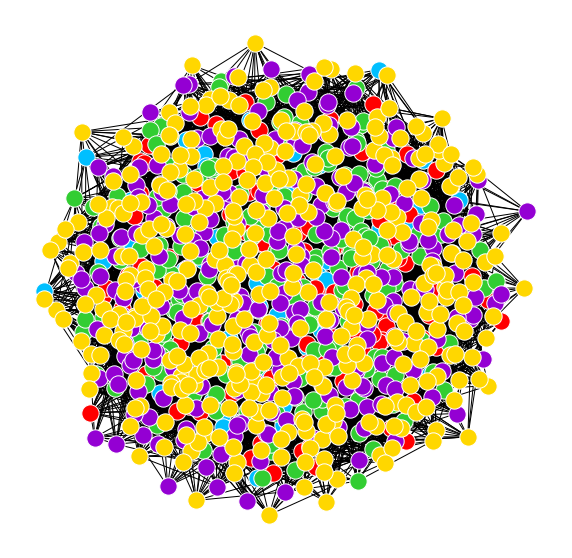

In [98]:
draw_lattice_particle_network(deg_dynamics_homo.g,X,pos=pos_homo,figsize=(10,10),file='figs/drafts/v2/fig5/homo_g.pdf')

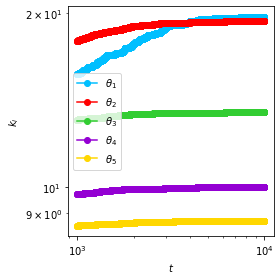

In [106]:
plt.figure(figsize=(4,4))
x = np.arange(1000,10000)
plt.loglog(x,np.mean(deg[0:50,1000:],axis=0),'-o',label=r'$\theta_1$',color='deepskyblue')
plt.loglog(x,np.mean(deg[50:150,1000:],axis=0),'-o',label=r'$\theta_2$',color='r')
plt.loglog(x,np.mean(deg[150:350,1000:],axis=0),'-o',label=r'$\theta_3$',color='limegreen')
plt.loglog(x,np.mean(deg[350:600,1000:],axis=0),'-o',label=r'$\theta_4$',color='darkviolet')
plt.loglog(x,np.mean(deg[600:,1000:],axis=0),'-o',label=r'$\theta_5$',color='gold')
plt.xlabel('$t$')
plt.ylabel('$k_i$')
plt.legend()
plt.tight_layout()
plt.savefig('figs/drafts/v2/fig5/hetero_last_9000_log.pdf')
plt.show()
# plt.loglog(x,x**(1/120),'--',color='k')
# plt.vlines(t_12,10**(0),10**2)

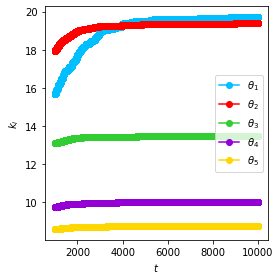

In [107]:
plt.figure(figsize=(4,4))
x = np.arange(1000,10000)
plt.plot(x,np.mean(deg[0:50,1000:],axis=0),'-o',label=r'$\theta_1$',color='deepskyblue')
plt.plot(x,np.mean(deg[50:150,1000:],axis=0),'-o',label=r'$\theta_2$',color='r')
plt.plot(x,np.mean(deg[150:350,1000:],axis=0),'-o',label=r'$\theta_3$',color='limegreen')
plt.plot(x,np.mean(deg[350:600,1000:],axis=0),'-o',label=r'$\theta_4$',color='darkviolet')
plt.plot(x,np.mean(deg[600:,1000:],axis=0),'-o',label=r'$\theta_5$',color='gold')
plt.xlabel('$t$')
plt.ylabel('$k_i$')
plt.legend()
plt.tight_layout()
plt.savefig('figs/drafts/v2/fig5/hetero_last_9000_lin.pdf')
plt.show()

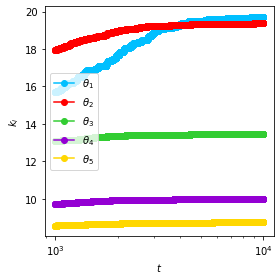

In [113]:
plt.figure(figsize=(4,4))
x = np.arange(1000,10000)
plt.semilogx(x,np.mean(deg[0:50,1000:],axis=0),'-o',label=r'$\theta_1$',color='deepskyblue')
plt.semilogx(x,np.mean(deg[50:150,1000:],axis=0),'-o',label=r'$\theta_2$',color='r')
plt.semilogx(x,np.mean(deg[150:350,1000:],axis=0),'-o',label=r'$\theta_3$',color='limegreen')
plt.semilogx(x,np.mean(deg[350:600,1000:],axis=0),'-o',label=r'$\theta_4$',color='darkviolet')
plt.semilogx(x,np.mean(deg[600:,1000:],axis=0),'-o',label=r'$\theta_5$',color='gold')
plt.xlabel('$t$')
plt.ylabel('$k_i$')
plt.legend()
plt.tight_layout()
plt.savefig('figs/drafts/v2/fig5/hetero_last_9000_semilogx.pdf')
plt.show()

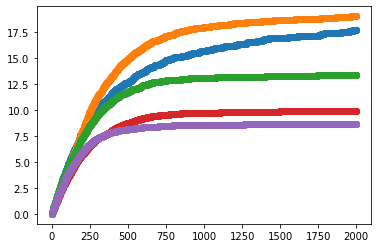

In [36]:
x = np.arange(2000)
plt.plot(x,np.mean(deg[0:50,:2000],axis=0),'-o')
plt.plot(x,np.mean(deg[50:150,:2000],axis=0),'-o')
plt.plot(x,np.mean(deg[150:350,:2000],axis=0),'-o')
plt.plot(x,np.mean(deg[350:600,:2000],axis=0),'-o')
plt.plot(x,np.mean(deg[600:,:2000],axis=0),'-o')
# plt.plot(x,x**(1)/12,'--',color='k')
# plt.vlines(500,10**(-2),10**2)

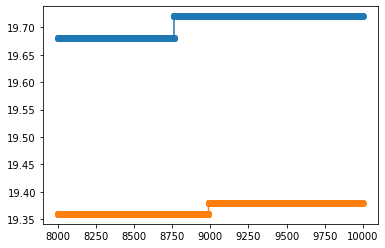

In [41]:
x = np.arange(8000,10000)
plt.plot(x,np.mean(deg[0:50,8000:],axis=0),'-o')
plt.plot(x,np.mean(deg[50:150,8000:],axis=0),'-o')
# plt.plot(x,np.mean(deg[150:350,1000:],axis=0),'-o')
# plt.plot(x,np.mean(deg[350:600,1000:2000],axis=0),'-o')
# plt.plot(x,np.mean(deg[600:,1000:2000],axis=0),'-o')
# plt.plot(x,x**(1)/12,'--',color='k')
# plt.vlines(500,10**(-2),10**2)

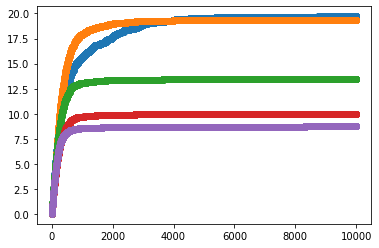

In [42]:
x = np.arange(10000)
plt.plot(x,np.mean(deg[0:50,:10000],axis=0),'-o')
plt.plot(x,np.mean(deg[50:150,:10000],axis=0),'-o')
plt.plot(x,np.mean(deg[150:350,:10000],axis=0),'-o')
plt.plot(x,np.mean(deg[350:600,:10000],axis=0),'-o')
plt.plot(x,np.mean(deg[600:,:10000],axis=0),'-o')

In [29]:
2+4+4+4+5

19

In [61]:
X_homo = np.zeros((1000,5))
X_homo[:200,0] = 1
X_homo[200:400,1] = 1
X_homo[400:600,2] = 1
X_homo[600:800,3] = 1
X_homo[800:,4] = 1

In [62]:
deg_dynamics_homo = nd.NetDesign(X_homo,capacities)

In [63]:
deg_homo = np.zeros((1000,10000))
for t in range(0,10000):
    deg_dynamics_homo.simulate(10)
    deg_homo[:,t] = np.array(deg_dynamics_homo.g.degree())[:,1]

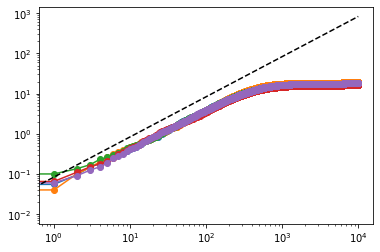

In [99]:
x = np.arange(10000)
plt.loglog(x,np.mean(deg_homo[0:200,:],axis=0),'-o',color='deepskyblue')
plt.loglog(x,np.mean(deg_homo[200:400,:],axis=0),'-o',color='r')
plt.loglog(x,np.mean(deg_homo[400:600,:],axis=0),'-o',color='limegreen')
plt.loglog(x,np.mean(deg_homo[600:800,:],axis=0),'-o',color='darkviolet')
plt.loglog(x,np.mean(deg_homo[800:,:],axis=0),'-o',color='gold')
plt.loglog(x,x**(1)/12,'--',color='k')
# plt.vlines(t_12,10**(-2),10**2)

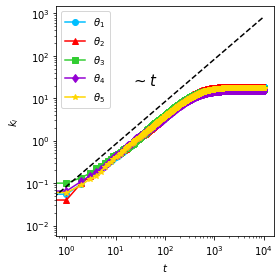

In [102]:
plt.figure(figsize=(4,4))
x = np.arange(10000)
plt.loglog(x,np.mean(deg_homo[0:200,:],axis=0),'-o',label=r'$\theta_1$',color='deepskyblue')
plt.loglog(x,np.mean(deg_homo[200:400,:],axis=0),'-^',label=r'$\theta_2$',color='r')
plt.loglog(x,np.mean(deg_homo[400:600,:],axis=0),'-s',label=r'$\theta_3$',color='limegreen')
plt.loglog(x,np.mean(deg_homo[600:800,:],axis=0),'-d',label=r'$\theta_4$',color='darkviolet')
plt.loglog(x,np.mean(deg_homo[800:,:],axis=0),'-*',label=r'$\theta_5$',color='gold')
plt.loglog(x,x**(1)/12,'--',color='k')
plt.legend()
plt.text(20,20,'$\sim t$',fontsize=15)
plt.xlabel('$t$')
plt.ylabel('$k_i$')
# plt.title('Heterogeneous Particle Distribution')
plt.tight_layout()
plt.savefig('figs/drafts/v2/fig5/homo_dynamics.pdf')
plt.show()

In [103]:
O = np.zeros((5,5))

In [104]:
for i in range(5):
    for j in range(5):
        O[i,j] = deg_dynamics_homo.capacity[i][j]

In [105]:
O

array([[6., 3., 2., 5., 4.],
       [2., 4., 4., 5., 5.],
       [4., 5., 4., 3., 4.],
       [5., 4., 4., 3., 4.],
       [6., 5., 4., 1., 4.]])

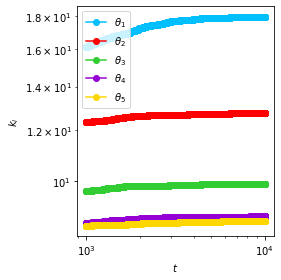

In [110]:
plt.figure(figsize=(4,4))
x = np.arange(1000,10000)
plt.loglog(x,np.mean(deg[0:200,1000:],axis=0),'-o',label=r'$\theta_1$',color='deepskyblue')
plt.loglog(x,np.mean(deg[200:400,1000:],axis=0),'-o',label=r'$\theta_2$',color='r')
plt.loglog(x,np.mean(deg[400:600,1000:],axis=0),'-o',label=r'$\theta_3$',color='limegreen')
plt.loglog(x,np.mean(deg[600:800,1000:],axis=0),'-o',label=r'$\theta_4$',color='darkviolet')
plt.loglog(x,np.mean(deg[800:,1000:],axis=0),'-o',label=r'$\theta_5$',color='gold')
plt.xlabel('$t$')
plt.ylabel('$k_i$')
plt.legend()
plt.tight_layout()
plt.savefig('figs/drafts/v2/fig5/homo_last_9000_log.pdf')
plt.show()

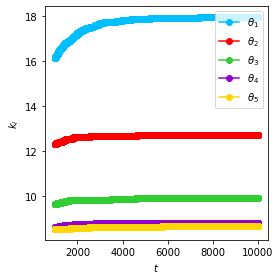

In [111]:
plt.figure(figsize=(4,4))
x = np.arange(1000,10000)
plt.plot(x,np.mean(deg[0:200,1000:],axis=0),'-o',label=r'$\theta_1$',color='deepskyblue')
plt.plot(x,np.mean(deg[200:400,1000:],axis=0),'-o',label=r'$\theta_2$',color='r')
plt.plot(x,np.mean(deg[400:600,1000:],axis=0),'-o',label=r'$\theta_3$',color='limegreen')
plt.plot(x,np.mean(deg[600:800,1000:],axis=0),'-o',label=r'$\theta_4$',color='darkviolet')
plt.plot(x,np.mean(deg[800:,1000:],axis=0),'-o',label=r'$\theta_5$',color='gold')
plt.xlabel('$t$')
plt.ylabel('$k_i$')
plt.legend()
plt.tight_layout()
plt.savefig('figs/drafts/v2/fig5/homo_last_9000_lin.pdf')
plt.show()

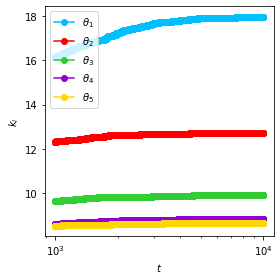

In [112]:
plt.figure(figsize=(4,4))
x = np.arange(1000,10000)
plt.semilogx(x,np.mean(deg[0:200,1000:],axis=0),'-o',label=r'$\theta_1$',color='deepskyblue')
plt.semilogx(x,np.mean(deg[200:400,1000:],axis=0),'-o',label=r'$\theta_2$',color='r')
plt.semilogx(x,np.mean(deg[400:600,1000:],axis=0),'-o',label=r'$\theta_3$',color='limegreen')
plt.semilogx(x,np.mean(deg[600:800,1000:],axis=0),'-o',label=r'$\theta_4$',color='darkviolet')
plt.semilogx(x,np.mean(deg[800:,1000:],axis=0),'-o',label=r'$\theta_5$',color='gold')
plt.xlabel('$t$')
plt.ylabel('$k_i$')
plt.legend()
plt.tight_layout()
plt.savefig('figs/drafts/v2/fig5/homo_last_9000_semilogx.pdf')
plt.show()

In [118]:
X_final_test = np.zeros((1000,2))
X_final_test[0,0] = 1
X_final_test[1:,1] = 1

In [119]:
final_capacity = {0:{0:0,1:999},1:{0:1,1:1}}

In [120]:
final = nd.NetDesign(X_final_test,final_capacity)

In [122]:
deg_final = np.zeros((1000,10000))
for t in range(0,10000):
    final.simulate(10)
    deg_final[:,t] = np.array(final.g.degree())[:,1]

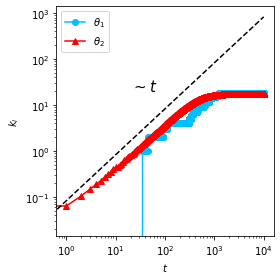

In [123]:
plt.figure(figsize=(4,4))
x = np.arange(10000)
plt.loglog(x,np.mean(deg_homo[:1,:],axis=0),'-o',label=r'$\theta_1$',color='deepskyblue')
plt.loglog(x,np.mean(deg_homo[1:,:],axis=0),'-^',label=r'$\theta_2$',color='r')
# plt.loglog(x,np.mean(deg_homo[400:600,:],axis=0),'-s',label=r'$\theta_3$',color='limegreen')
# plt.loglog(x,np.mean(deg_homo[600:800,:],axis=0),'-d',label=r'$\theta_4$',color='darkviolet')
# plt.loglog(x,np.mean(deg_homo[800:,:],axis=0),'-*',label=r'$\theta_5$',color='gold')
plt.loglog(x,x**(1)/12,'--',color='k')
plt.legend()
plt.text(20,20,'$\sim t$',fontsize=15)
plt.xlabel('$t$')
plt.ylabel('$k_i$')
# plt.title('Heterogeneous Particle Distribution')
plt.tight_layout()
plt.savefig('figs/drafts/v2/fig5/final_dynamics.pdf')
plt.show()

IndexError: index 2 is out of bounds for axis 1 with size 2

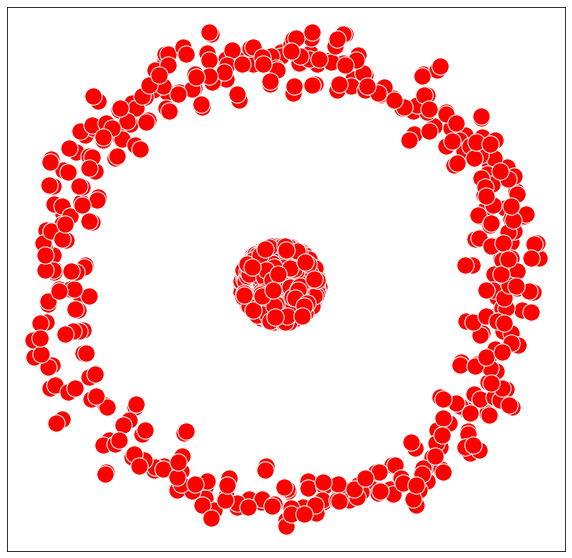

In [125]:
draw_lattice_particle_network(final.g,X_final_test,figsize=(10,10))